In [6]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your data 
data = pd.read_csv('cleaneded_main_model_data.csv')

# Select relevant features and target variable
selected_features = ['T (K)', 'P (MPa)', 'methane', 'ethane',
                     'propane', 'ibutane', 'ipentane', 'hexane',
                     'heptane', 'helium', 'oxygen', 'H2S', 'CO2']
target_variable = 'z'
X = data[selected_features]
y = data[target_variable]


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the GPR model with an appropriate kernel
kernel = 1.0 * RBF() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)


C:\Users\okola\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10, random_state=0)

In [8]:
# Predict the target variable for test data
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2) value
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.9f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.9f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.9f}')
print(f'R-squared (R2) Value: {r2:.9f}')


Mean Absolute Error (MAE): 0.000110650
Mean Absolute Percentage Error (MAPE): 0.011103479%
Root Mean Squared Error (RMSE): 0.000170255
R-squared (R2) Value: 0.974279820


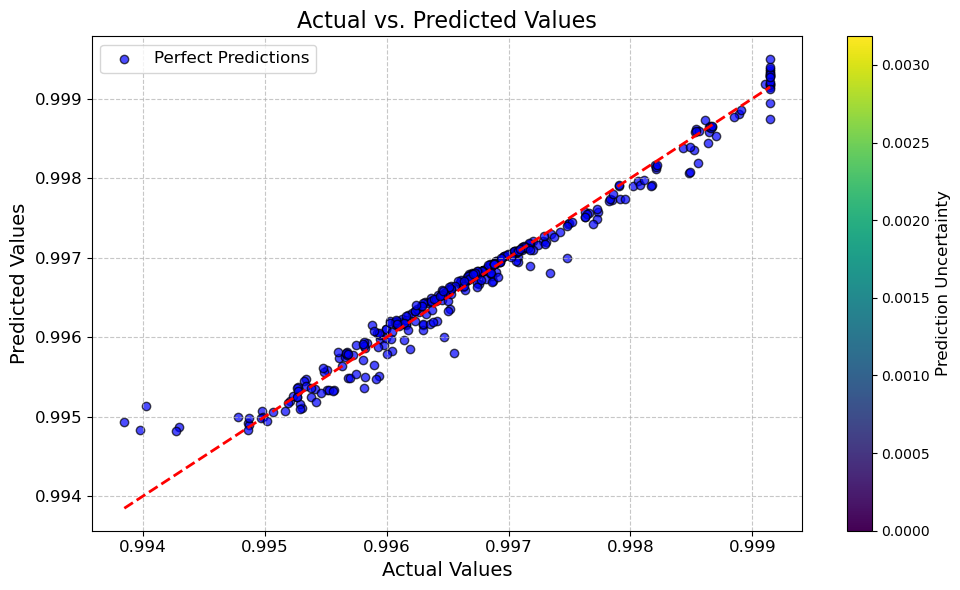

In [10]:

# Make predictions on the test set
y_pred, sigma = model.predict(X_test, return_std=True)

# Create a scatter plot with improved styling
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, c='b', edgecolors='k', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Perfect Predictions'], fontsize=12)
plt.tight_layout()  # Avoids cutoff labels

# Adding a color bar for the prediction uncertainty
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(0, max(sigma))), ax=plt.gca())
cbar.set_label('Prediction Uncertainty', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.show()


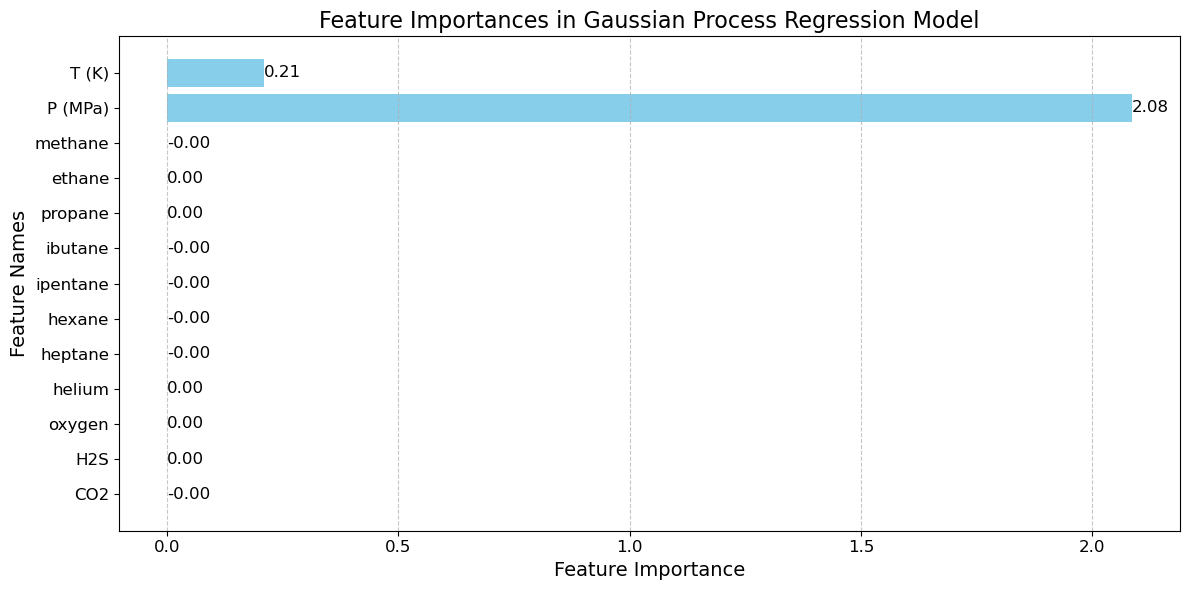

In [11]:
from sklearn.inspection import permutation_importance

# Calculate feature importances using permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=0)

# Extract feature importances and names
feature_importances = result.importances_mean
feature_names = selected_features

# Plot feature importances 
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature Names', fontsize=14)
plt.title('Feature Importances in Gaussian Process Regression Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate the bars with their values
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)

plt.show()


In [12]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('Gaussian_Process_Regression_pred_values.csv', index=False)
